# Load Into CNN Stock Prediction G-Drive folder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


In [ ]:
%cd "drive/MyDrive/CNN Stock Prediction"

/content/drive/.shortcut-targets-by-id/11M8JhuGjMeTkxBAoI1sL3lLEa69ylHrV/CNN Stock Prediction


In [ ]:
!ls data/labeled/

AlphaVantage  YahooFinance


# Download and Import Dependencies

In [ ]:
!pip install ta

#### TA-LIB ####
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py310hde88566_4.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.10/dist-packages/ lib/python3.10/site-packages/talib --strip-components=3

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29411 sha256=7ebbbf4fd4a56a76fa9520ec296cfbc19ff49842402aae87cdd292cd3ef5fbc2
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4095    0  4095    0     0  10119      0 --:--:-- --:--:-- --:--:-- 10136
100  517k  100  517k    0     0   510k      0  0:00:01  0:00:01 --:--:-- 2068k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4119    0  4119    0     0  11181      0 --:--:-- --:--:-- --:--:-- 11192
100  392k  100  392k    0     0   204k      0  0:00:01  0:00:01 --:--:--  290k


In [ ]:
import pandas as pd
import numpy as np
import json
import requests
import talib
import ta

import matplotlib as plt
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

# optional pandas display options
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 150)

# Load Labeled Data

In [ ]:
stock = "IBM"
labeled_path = f"data/labeled_indicators/{stock}_model_labeled_indicators.csv"
df = pd.read_csv(labeled_path)
df.head(30)

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,adjustRatio,Label,RSI_ta_6,RSI_ta_7,RSI_ta_8,RSI_ta_9,RSI_ta_10,RSI_ta_11,RSI_ta_12,RSI_ta_13,RSI_ta_14,RSI_ta_15,RSI_ta_16,RSI_ta_17,RSI_ta_18,RSI_ta_19,RSI_ta_20,WILLR_ta_6,WILLR_ta_7,WILLR_ta_8,WILLR_ta_9,WILLR_ta_10,WILLR_ta_11,WILLR_ta_12,WILLR_ta_13,WILLR_ta_14,WILLR_ta_15,WILLR_ta_16,WILLR_ta_17,WILLR_ta_18,WILLR_ta_19,WILLR_ta_20,SMA_ta_6,SMA_ta_7,SMA_ta_8,SMA_ta_9,SMA_ta_10,SMA_ta_11,SMA_ta_12,SMA_ta_13,SMA_ta_14,SMA_ta_15,SMA_ta_16,SMA_ta_17,SMA_ta_18,SMA_ta_19,SMA_ta_20,EMA_ta_6,EMA_ta_7,EMA_ta_8,EMA_ta_9,EMA_ta_10,EMA_ta_11,EMA_ta_12,EMA_ta_13,EMA_ta_14,EMA_ta_15,EMA_ta_16,EMA_ta_17,EMA_ta_18,EMA_ta_19,EMA_ta_20,WMA_ta_6,WMA_ta_7,WMA_ta_8,WMA_ta_9,WMA_ta_10,WMA_ta_11,WMA_ta_12,WMA_ta_13,WMA_ta_14,WMA_ta_15,WMA_ta_16,WMA_ta_17,WMA_ta_18,WMA_ta_19,WMA_ta_20,HMA_6,HMA_7,HMA_8,HMA_9,HMA_10,HMA_11,HMA_12,HMA_13,HMA_14,HMA_15,HMA_16,HMA_17,HMA_18,HMA_19,HMA_20,...,DCW_ta_11,DCW_ta_12,DCW_ta_13,DCW_ta_14,DCW_ta_15,DCW_ta_16,DCW_ta_17,DCW_ta_18,DCW_ta_19,DCW_ta_20,CMF_ta_6,CMF_ta_7,CMF_ta_8,CMF_ta_9,CMF_ta_10,CMF_ta_11,CMF_ta_12,CMF_ta_13,CMF_ta_14,CMF_ta_15,CMF_ta_16,CMF_ta_17,CMF_ta_18,CMF_ta_19,CMF_ta_20,DX_talib_6,DX_talib_7,DX_talib_8,DX_talib_9,DX_talib_10,DX_talib_11,DX_talib_12,DX_talib_13,DX_talib_14,DX_talib_15,DX_talib_16,DX_talib_17,DX_talib_18,DX_talib_19,DX_talib_20,KAMA_talib_6,KAMA_talib_7,KAMA_talib_8,KAMA_talib_9,KAMA_talib_10,KAMA_talib_11,KAMA_talib_12,KAMA_talib_13,KAMA_talib_14,KAMA_talib_15,KAMA_talib_16,KAMA_talib_17,KAMA_talib_18,KAMA_talib_19,KAMA_talib_20,DEMA_talib_6,DEMA_talib_7,DEMA_talib_8,DEMA_talib_9,DEMA_talib_10,DEMA_talib_11,DEMA_talib_12,DEMA_talib_13,DEMA_talib_14,DEMA_talib_15,DEMA_talib_16,DEMA_talib_17,DEMA_talib_18,DEMA_talib_19,DEMA_talib_20,TRIX_talib_6,TRIX_talib_7,TRIX_talib_8,TRIX_talib_9,TRIX_talib_10,TRIX_talib_11,TRIX_talib_12,TRIX_talib_13,TRIX_talib_14,TRIX_talib_15,TRIX_talib_16,TRIX_talib_17,TRIX_talib_18,TRIX_talib_19,TRIX_talib_20,AWSM_ta_6,AWSM_ta_7,AWSM_ta_8,AWSM_ta_9,AWSM_ta_10,AWSM_ta_11,AWSM_ta_12,AWSM_ta_13,AWSM_ta_14,AWSM_ta_15,AWSM_ta_16,AWSM_ta_17,AWSM_ta_18,AWSM_ta_19,AWSM_ta_20
0,0,2004-04-12,159.71,161.18,89.29,160.12,89.62,3255780,1.79,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2004-04-13,160.20,160.61,88.43,158.91,88.95,5244226,1.79,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2004-04-14,157.31,160.31,88.05,160.04,89.58,5560850,1.79,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

# CNN Model

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

!pip install h5py

## CNN Model Implementation

In [ ]:
params = {
    "input_w": 15,
    "input_h": 15,
    "input_c": 1,
    "num_classes": 3,
    "batch_size": 1024,
    "epochs": 800
    }

In [ ]:
# CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(params["input_w"], params["input_h"], params["input_c"])))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(params["num_classes"], activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy', 'mae', 'mse'])

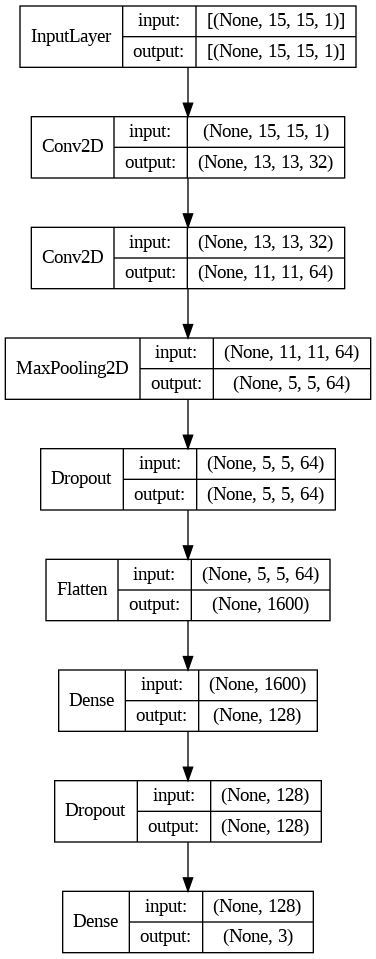

In [ ]:
# Plot Model
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot, plot_model

plot_model(model, to_file='data/4_model.png', show_shapes=True, show_layer_names=False)

## Model Compiler Function

In [ ]:
def createCNN():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(params["input_w"], params["input_h"], params["input_c"])))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(params["num_classes"], activation='softmax'))
  model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=keras.optimizers.Adadelta(),
                metrics=['accuracy', 'mae', 'mse'])

  return model

## Model Checkpoint Callbacks

In [ ]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger, Callback

rlp = ReduceLROnPlateau(monitor='loss', factor=0.02, patience=20, verbose=2, mode='min',
                        min_delta=0.001, cooldown=1, min_lr=0.0001) # Adjusts Learning Rate on loss

# Feature Selection

### Clean Data

In [ ]:
# Labels: 0 - Hold, 1 - Buy, 2 - Sell

cleaned_df = df.drop(['Unnamed: 0'], axis=1)
cleaned_df = cleaned_df.dropna()
cleaned_df.head(50)

,Date,Open,High,Low,Close,Adj Close,Volume,adjustRatio,Label,RSI_ta_6,RSI_ta_7,RSI_ta_8,RSI_ta_9,RSI_ta_10,RSI_ta_11,RSI_ta_12,RSI_ta_13,RSI_ta_14,RSI_ta_15,RSI_ta_16,RSI_ta_17,RSI_ta_18,RSI_ta_19,RSI_ta_20,WILLR_ta_6,WILLR_ta_7,WILLR_ta_8,WILLR_ta_9,WILLR_ta_10,WILLR_ta_11,WILLR_ta_12,WILLR_ta_13,WILLR_ta_14,WILLR_ta_15,WILLR_ta_16,WILLR_ta_17,WILLR_ta_18,WILLR_ta_19,WILLR_ta_20,SMA_ta_6,SMA_ta_7,SMA_ta_8,SMA_ta_9,SMA_ta_10,SMA_ta_11,SMA_ta_12,SMA_ta_13,SMA_ta_14,SMA_ta_15,SMA_ta_16,SMA_ta_17,SMA_ta_18,SMA_ta_19,SMA_ta_20,EMA_ta_6,EMA_ta_7,EMA_ta_8,EMA_ta_9,EMA_ta_10,EMA_ta_11,EMA_ta_12,EMA_ta_13,EMA_ta_14,EMA_ta_15,EMA_ta_16,EMA_ta_17,EMA_ta_18,EMA_ta_19,EMA_ta_20,WMA_ta_6,WMA_ta_7,WMA_ta_8,WMA_ta_9,WMA_ta_10,WMA_ta_11,WMA_ta_12,WMA_ta_13,WMA_ta_14,WMA_ta_15,WMA_ta_16,WMA_ta_17,WMA_ta_18,WMA_ta_19,WMA_ta_20,HMA_6,HMA_7,HMA_8,HMA_9,HMA_10,HMA_11,HMA_12,HMA_13,HMA_14,HMA_15,HMA_16,HMA_17,HMA_18,HMA_19,HMA_20,TEMA_talib_6,...,DCW_ta_11,DCW_ta_12,DCW_ta_13,DCW_ta_14,DCW_ta_15,DCW_ta_16,DCW_ta_17,DCW_ta_18,DCW_ta_19,DCW_ta_20,CMF_ta_6,CMF_ta_7,CMF_ta_8,CMF_ta_9,CMF_ta_10,CMF_ta_11,CMF_ta_12,CMF_ta_13,CMF_ta_14,CMF_ta_15,CMF_ta_16,CMF_ta_17,CMF_ta_18,CMF_ta_19,CMF_ta_20,DX_talib_6,DX_talib_7,DX_talib_8,DX_talib_9,DX_talib_10,DX_talib_11,DX_talib_12,DX_talib_13,DX_talib_14,DX_talib_15,DX_talib_16,DX_talib_17,DX_talib_18,DX_talib_19,DX_talib_20,KAMA_talib_6,KAMA_talib_7,KAMA_talib_8,KAMA_talib_9,KAMA_talib_10,KAMA_talib_11,KAMA_talib_12,KAMA_talib_13,KAMA_talib_14,KAMA_talib_15,KAMA_talib_16,KAMA_talib_17,KAMA_talib_18,KAMA_talib_19,KAMA_talib_20,DEMA_talib_6,DEMA_talib_7,DEMA_talib_8,DEMA_talib_9,DEMA_talib_10,DEMA_talib_11,DEMA_talib_12,DEMA_talib_13,DEMA_talib_14,DEMA_talib_15,DEMA_talib_16,DEMA_talib_17,DEMA_talib_18,DEMA_talib_19,DEMA_talib_20,TRIX_talib_6,TRIX_talib_7,TRIX_talib_8,TRIX_talib_9,TRIX_talib_10,TRIX_talib_11,TRIX_talib_12,TRIX_talib_13,TRIX_talib_14,TRIX_talib_15,TRIX_talib_16,TRIX_talib_17,TRIX_talib_18,TRIX_talib_19,TRIX_talib_20,AWSM_ta_6,AWSM_ta_7,AWSM_ta_8,AWSM_ta_9,AWSM_ta_10,AWSM_ta_11,AWSM_ta_12,AWSM_ta_13,AWSM_ta_14,AWSM_ta_15,AWSM_ta_16,AWSM_ta_17,AWSM_ta_18,AWSM_ta_19,AWSM_ta_20
59,2004-07-07,145.42,146.51,81.31,145.51,81.60,5938456,1.78,0,10.900907,13.984287,16.808864,19.335721,21.561469,23.502503,25.184977,26.638602,27.893021,28.975873,29.911922,30.722803,31.427122,32.040717,32.576989,-7.679034,-10.746559,-11.411619,-12.854622,-12.854622,-12.854622,-12.854622,-12.854622,-12.854622,-12.890095,-13.430421,-13.430421,-13.430421,-13.430421,-13.430421,148.303333,148.717143,149.20625,149.671111,150.181,150.477273,150.649167,150.869231,151.104286,151.302667,151.491875,151.611176,151.755000,151.850000,151.9310,147.995766,148.369944,148.697187,148.981817,149.228463,149.441753,149.626122,149.785688,149.924189,150.044952,150.150901,150.244572,150.328140,150.403462,150.472105,147.393333,147.724286,148.053611,148.377111,148.705091,149.000455,149.254103,149.484835,149.700762,149.901000,150.088162,150.257386,150.415029,150.558526,150.689238,145.595476,145.271012,145.828250,146.289704,146.691071,146.453515,146.871520,146.676471,147.110619,146.944262,148.048243,147.923734,148.357915,148.267474,148.687556,145.368234,...,48.957559,48.901698,48.830368,48.754408,48.710311,48.953120,48.914600,48.868242,48.837669,48.811632,0.966997,0.963531,0.963962,0.963023,0.966165,0.968012,0.967007,0.966599,0.968300,0.968512,0.968424,0.968754,0.969465,0.969933,0.970367,68.032267,58.822465,50.494489,43.207374,36.976419,31.727596,27.355007,23.717858,20.724687,18.320672,16.381023,14.850343,13.527762,12.456011,11.633647,146.964782,147.130325,147.391525,147.961412,148.942750,149.235872,149.188536,149.199142,149.284805,149.493232,149.776409,150.013145,150.336598,150.676635,151.254884,146.001112,146.269739,146.560925,146.862878,147.165391,147.460018,147.740468,148.001945,148.240479,148.454683,148.645172,148.817093,148.972279,149.110118,149.232712,-0.358605,-0.274805,-0.204901,-0.148434,-0.104266,-0.070958,-0.046672,-0.029651,-0.018668,-0.011887,

In [ ]:
# drop non feature columns
cols_to_drop = ["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume", "adjustRatio"]
cleaned_df = cleaned_df.drop(cols_to_drop, axis = 1)

# drop last 5 rows
cleaned_df = cleaned_df.iloc[:-5, :]

cleaned_df.head()

,Label,RSI_ta_6,RSI_ta_7,RSI_ta_8,RSI_ta_9,RSI_ta_10,RSI_ta_11,RSI_ta_12,RSI_ta_13,RSI_ta_14,RSI_ta_15,RSI_ta_16,RSI_ta_17,RSI_ta_18,RSI_ta_19,RSI_ta_20,WILLR_ta_6,WILLR_ta_7,WILLR_ta_8,WILLR_ta_9,WILLR_ta_10,WILLR_ta_11,WILLR_ta_12,WILLR_ta_13,WILLR_ta_14,WILLR_ta_15,WILLR_ta_16,WILLR_ta_17,WILLR_ta_18,WILLR_ta_19,WILLR_ta_20,SMA_ta_6,SMA_ta_7,SMA_ta_8,SMA_ta_9,SMA_ta_10,SMA_ta_11,SMA_ta_12,SMA_ta_13,SMA_ta_14,SMA_ta_15,SMA_ta_16,SMA_ta_17,SMA_ta_18,SMA_ta_19,SMA_ta_20,EMA_ta_6,EMA_ta_7,EMA_ta_8,EMA_ta_9,EMA_ta_10,EMA_ta_11,EMA_ta_12,EMA_ta_13,EMA_ta_14,EMA_ta_15,EMA_ta_16,EMA_ta_17,EMA_ta_18,EMA_ta_19,EMA_ta_20,WMA_ta_6,WMA_ta_7,WMA_ta_8,WMA_ta_9,WMA_ta_10,WMA_ta_11,WMA_ta_12,WMA_ta_13,WMA_ta_14,WMA_ta_15,WMA_ta_16,WMA_ta_17,WMA_ta_18,WMA_ta_19,WMA_ta_20,HMA_6,HMA_7,HMA_8,HMA_9,HMA_10,HMA_11,HMA_12,HMA_13,HMA_14,HMA_15,HMA_16,HMA_17,HMA_18,HMA_19,HMA_20,TEMA_talib_6,TEMA_talib_7,TEMA_talib_8,TEMA_talib_9,TEMA_talib_10,TEMA_talib_11,TEMA_talib_12,TEMA_talib_13,TEMA_talib_14,...,DCW_ta_11,DCW_ta_12,DCW_ta_13,DCW_ta_14,DCW_ta_15,DCW_ta_16,DCW_ta_17,DCW_ta_18,DCW_ta_19,DCW_ta_20,CMF_ta_6,CMF_ta_7,CMF_ta_8,CMF_ta_9,CMF_ta_10,CMF_ta_11,CMF_ta_12,CMF_ta_13,CMF_ta_14,CMF_ta_15,CMF_ta_16,CMF_ta_17,CMF_ta_18,CMF_ta_19,CMF_ta_20,DX_talib_6,DX_talib_7,DX_talib_8,DX_talib_9,DX_talib_10,DX_talib_11,DX_talib_12,DX_talib_13,DX_talib_14,DX_talib_15,DX_talib_16,DX_talib_17,DX_talib_18,DX_talib_19,DX_talib_20,KAMA_talib_6,KAMA_talib_7,KAMA_talib_8,KAMA_talib_9,KAMA_talib_10,KAMA_talib_11,KAMA_talib_12,KAMA_talib_13,KAMA_talib_14,KAMA_talib_15,KAMA_talib_16,KAMA_talib_17,KAMA_talib_18,KAMA_talib_19,KAMA_talib_20,DEMA_talib_6,DEMA_talib_7,DEMA_talib_8,DEMA_talib_9,DEMA_talib_10,DEMA_talib_11,DEMA_talib_12,DEMA_talib_13,DEMA_talib_14,DEMA_talib_15,DEMA_talib_16,DEMA_talib_17,DEMA_talib_18,DEMA_talib_19,DEMA_talib_20,TRIX_talib_6,TRIX_talib_7,TRIX_talib_8,TRIX_talib_9,TRIX_talib_10,TRIX_talib_11,TRIX_talib_12,TRIX_talib_13,TRIX_talib_14,TRIX_talib_15,TRIX_talib_16,TRIX_talib_17,TRIX_talib_18,TRIX_talib_19,TRIX_talib_20,AWSM_ta_6,AWSM_ta_7,AWSM_ta_8,AWSM_ta_9,AWSM_ta_10,AWSM_ta_11,AWSM_ta_12,AWSM_ta_13,AWSM_ta_14,AWSM_ta_15,AWSM_ta_16,AWSM_ta_17,AWSM_ta_18,AWSM_ta_19,AWSM_ta_20
59,0,10.900907,13.984287,16.808864,19.335721,21.561469,23.502503,25.184977,26.638602,27.893021,28.975873,29.911922,30.722803,31.427122,32.040717,32.576989,-7.679034,-10.746559,-11.411619,-12.854622,-12.854622,-12.854622,-12.854622,-12.854622,-12.854622,-12.890095,-13.430421,-13.430421,-13.430421,-13.430421,-13.430421,148.303333,148.717143,149.20625,149.671111,150.181,150.477273,150.649167,150.869231,151.104286,151.302667,151.491875,151.611176,151.755000,151.850000,151.9310,147.995766,148.369944,148.697187,148.981817,149.228463,149.441753,149.626122,149.785688,149.924189,150.044952,150.150901,150.244572,150.328140,150.403462,150.472105,147.393333,147.724286,148.053611,148.377111,148.705091,149.000455,149.254103,149.484835,149.700762,149.901000,150.088162,150.257386,150.415029,150.558526,150.689238,145.595476,145.271012,145.828250,146.289704,146.691071,146.453515,146.871520,146.676471,147.110619,146.944262,148.048243,147.923734,148.357915,148.267474,148.687556,145.368234,145.423820,145.516436,145.647778,145.816252,146.017753,146.244797,146.488142,146.740297,...,48.957559,48.901698,48.830368,48.754408,48.710311,48.953120,48.914600,48.868242,48.837669,48.811632,0.966997,0.963531,0.963962,0.963023,0.966165,0.968012,0.967007,0.966599,0.968300,0.968512,0.968424,0.968754,0.969465,0.969933,0.970367,68.032267,58.822465,50.494489,43.207374,36.976419,31.727596,27.355007,23.717858,20.724687,18.320672,16.381023,14.850343,13.527762,12.456011,11.633647,146.964782,147.130325,147.391525,147.961412,148.942750,149.235872,149.188536,149.199142,149.284805,149.493232,149.776409,150.013145,150.336598,150.676635,151.254884,146.001112,146.269739,146.560925,146.862878,147.165391,147.460018,147.740468,148.001945,148.240479,148.454683,148.645172,148.817093,148.972279,149.110118,149.232712,-0.358605,-0.2

In [ ]:
print(f"Original dataframe has {cleaned_df.shape[0]} records with {cleaned_df.shape[1]} features")

Original dataframe has 3894 records with 421 features


In [ ]:
# count labels
cleaned_df.Label.value_counts()

Label
0    3399
2     251
1     244
Name: count, dtype: int64

### Select Features From Training Set

In [ ]:
# Feature columns
X = cleaned_df.iloc[:, cleaned_df.columns != 'Label']

# Outcome column
y = cleaned_df.iloc[:, cleaned_df.columns == 'Label']

print("Shape of Features: ", X.values.shape)
print("Shape of Labels: ", y.values.shape)

Shape of Features:  (3894, 420)
Shape of Labels:  (3894, 1)


### Cross Validation

#### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

In [ ]:
# Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, train_size=0.8,
                                                    test_size=0.2, random_state=2, shuffle=True,
                                                    stratify=y.values)

In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (3115, 420)
y_train shape: (3115, 1)
X_test shape: (779, 420)
y_test shape: (779, 1)


In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 2719]
 [   1  195]
 [   2  201]]


In [ ]:
unique, counts = np.unique(y_test, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 680]
 [  1  49]
 [  2  50]]


#### Model Outcome Function

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

def modelPlotter(hist, fold):
  plt.figure()

  plt.plot(hist.history['loss'])
  plt.plot(hist.history['accuracy'])

  plt.title(f'Model Loss and Accuracy: Fold {fold}')
  plt.xlabel('Epoch')
  plt.legend(['train_loss', 'accuracy'], loc='upper left')

  plt.show()

#### StratifiedKFold CV

In [ ]:
# set up k folds
skf = StratifiedKFold(n_splits=5, shuffle = True)
skf.get_n_splits(X, y), skf

(5, StratifiedKFold(n_splits=5, random_state=None, shuffle=True))

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# univariate feature selection for top 225 features
selector = SelectKBest(f_classif, k=225)

# min max scalar
MM_SCALER = MinMaxScaler(feature_range=(-1, 1))

# One Hot Encode Labels
"""
0 -> [1, 0, 0]
1 -> [0, 1, 0]
2 -> [0, 0, 1]
"""
OHE = OneHotEncoder(sparse=False, categories='auto')

-------Fold 1-------
X_train shape: (2492, 420), y_train shape: (2492, 1)
X_test shape: (623, 420), y_test shape: (623, 1)
Training set buy/sell/hold split:
[[   0 2175]
 [   1  156]
 [   2  161]]
[[   0 2175]
 [   1  156]
 [   2  161]]
Test set buy/sell/hold split:
[[  0 544]
 [  1  39]
 [  2  40]]
[[  0 544]
 [  1  39]
 [  2  40]]
X_train_selected shape: (2492, 225)
y_val labels shape: (2492, 3), y_test labels shape: (623, 3)
X_train (fold) Images shape: (2492, 15, 15, 1), X_test (fold) Images shape: (623, 15, 15, 1)



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/800
3/3 - 10s - loss: 1.1412 - accuracy: 0.2135 - mae: 0.4523 - mse: 0.2318 - lr: 0.0010 - 10s/epoch - 3s/step
Epoch 2/800
3/3 - 0s - loss: 1.1390 - accuracy: 0.2099 - mae: 0.4520 - mse: 0.2315 - lr: 0.0010 - 79ms/epoch - 26ms/step
Epoch 3/800
3/3 - 0s - loss: 1.1400 - accuracy: 0.1958 - mae: 0.4522 - mse: 0.2317 - lr: 0.0010 - 72ms/epoch - 24ms/step
Epoch 4/800
3/3 - 0s - loss: 1.1366 - accuracy: 0.2227 - mae: 0.4515 - mse: 0.2309 - lr: 0.0010 - 82ms/epoch - 27ms/step
Epoch 5/800
3/3 - 0s - loss: 1.1381 - accuracy: 0.2191 - mae: 0.4518 - mse: 0.2313 - lr: 0.0010 - 65ms/epoch - 22ms/step
Epoch 6/800
3/3 - 0s - loss: 1.1377 - accuracy: 0.2263 - mae: 0.4517 - mse: 0.2311 - lr: 0.0010 - 81ms/epoch - 27ms/step
Epoch 7/800
3/3 - 0s - loss: 1.1346 - accuracy: 0.2255 - mae: 0.4510 - mse: 0.2305 - lr: 0.0010 - 81ms/epoch - 27ms/step
Epoch 8/800
3/3 - 0s - loss: 1.1345 - accuracy: 0.2251 - mae: 0.4511 - mse: 0.2305 - lr: 0.0010 - 58ms/epoch - 19ms/step
Epoch 9/800
3/3 - 0s - loss: 1.131

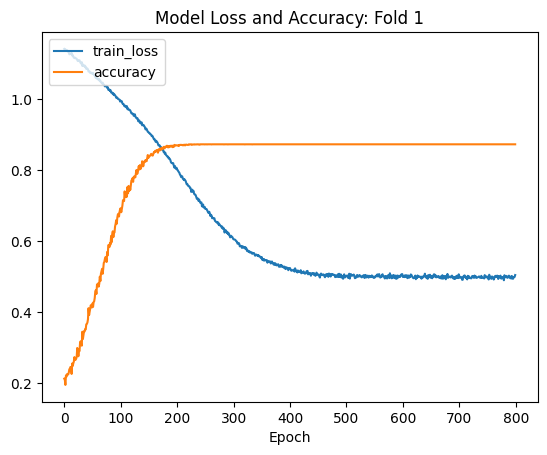

1/1 - 0s - loss: 0.4914 - accuracy: 0.8732 - mae: 0.1754 - mse: 0.0804 - 407ms/epoch - 407ms/step
['loss', 'accuracy', 'mae', 'mse']
-------Fold 2-------
X_train shape: (2492, 420), y_train shape: (2492, 1)
X_test shape: (623, 420), y_test shape: (623, 1)
Training set buy/sell/hold split:
[[   0 2175]
 [   1  156]
 [   2  161]]
[[   0 2175]
 [   1  156]
 [   2  161]]
Test set buy/sell/hold split:
[[  0 544]
 [  1  39]
 [  2  40]]
[[  0 544]
 [  1  39]
 [  2  40]]
X_train_selected shape: (2492, 225)
y_val labels shape: (2492, 3), y_test labels shape: (623, 3)
X_train (fold) Images shape: (2492, 15, 15, 1), X_test (fold) Images shape: (623, 15, 15, 1)

Epoch 1/800


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


3/3 - 1s - loss: 1.1071 - accuracy: 0.3130 - mae: 0.4455 - mse: 0.2242 - lr: 0.0010 - 1s/epoch - 378ms/step
Epoch 2/800
3/3 - 0s - loss: 1.1037 - accuracy: 0.3258 - mae: 0.4448 - mse: 0.2234 - lr: 0.0010 - 38ms/epoch - 13ms/step
Epoch 3/800
3/3 - 0s - loss: 1.1040 - accuracy: 0.3186 - mae: 0.4449 - mse: 0.2235 - lr: 0.0010 - 37ms/epoch - 12ms/step
Epoch 4/800
3/3 - 0s - loss: 1.1003 - accuracy: 0.3363 - mae: 0.4441 - mse: 0.2227 - lr: 0.0010 - 38ms/epoch - 13ms/step
Epoch 5/800
3/3 - 0s - loss: 1.1031 - accuracy: 0.3315 - mae: 0.4446 - mse: 0.2233 - lr: 0.0010 - 41ms/epoch - 14ms/step
Epoch 6/800
3/3 - 0s - loss: 1.1003 - accuracy: 0.3415 - mae: 0.4440 - mse: 0.2227 - lr: 0.0010 - 37ms/epoch - 12ms/step
Epoch 7/800
3/3 - 0s - loss: 1.0984 - accuracy: 0.3415 - mae: 0.4436 - mse: 0.2223 - lr: 0.0010 - 35ms/epoch - 12ms/step
Epoch 8/800
3/3 - 0s - loss: 1.0985 - accuracy: 0.3471 - mae: 0.4436 - mse: 0.2223 - lr: 0.0010 - 36ms/epoch - 12ms/step
Epoch 9/800
3/3 - 0s - loss: 1.0969 - accurac

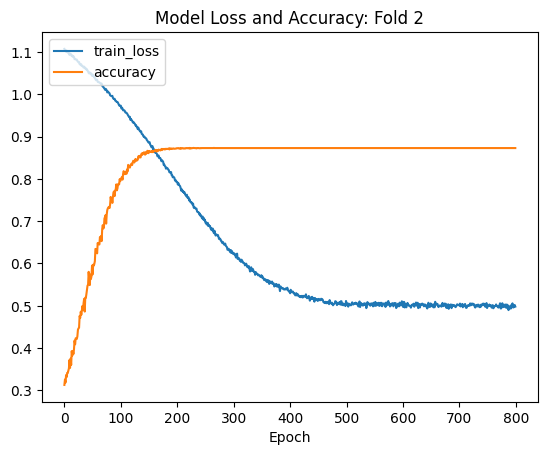

1/1 - 0s - loss: 0.4856 - accuracy: 0.8732 - mae: 0.1747 - mse: 0.0792 - 167ms/epoch - 167ms/step
['loss', 'accuracy', 'mae', 'mse']
-------Fold 3-------
X_train shape: (2492, 420), y_train shape: (2492, 1)
X_test shape: (623, 420), y_test shape: (623, 1)
Training set buy/sell/hold split:
[[   0 2175]
 [   1  156]
 [   2  161]]
[[   0 2175]
 [   1  156]
 [   2  161]]
Test set buy/sell/hold split:
[[  0 544]
 [  1  39]
 [  2  40]]
[[  0 544]
 [  1  39]
 [  2  40]]
X_train_selected shape: (2492, 225)
y_val labels shape: (2492, 3), y_test labels shape: (623, 3)
X_train (fold) Images shape: (2492, 15, 15, 1), X_test (fold) Images shape: (623, 15, 15, 1)

Epoch 1/800


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


3/3 - 1s - loss: 1.1478 - accuracy: 0.1601 - mae: 0.4536 - mse: 0.2339 - lr: 0.0010 - 1s/epoch - 359ms/step
Epoch 2/800
3/3 - 0s - loss: 1.1462 - accuracy: 0.1677 - mae: 0.4533 - mse: 0.2335 - lr: 0.0010 - 48ms/epoch - 16ms/step
Epoch 3/800
3/3 - 0s - loss: 1.1425 - accuracy: 0.1858 - mae: 0.4525 - mse: 0.2327 - lr: 0.0010 - 46ms/epoch - 15ms/step
Epoch 4/800
3/3 - 0s - loss: 1.1410 - accuracy: 0.1794 - mae: 0.4522 - mse: 0.2325 - lr: 0.0010 - 46ms/epoch - 15ms/step
Epoch 5/800
3/3 - 0s - loss: 1.1378 - accuracy: 0.1858 - mae: 0.4515 - mse: 0.2317 - lr: 0.0010 - 47ms/epoch - 16ms/step
Epoch 6/800
3/3 - 0s - loss: 1.1366 - accuracy: 0.1922 - mae: 0.4512 - mse: 0.2314 - lr: 0.0010 - 38ms/epoch - 13ms/step
Epoch 7/800
3/3 - 0s - loss: 1.1432 - accuracy: 0.1637 - mae: 0.4527 - mse: 0.2329 - lr: 0.0010 - 38ms/epoch - 13ms/step
Epoch 8/800
3/3 - 0s - loss: 1.1396 - accuracy: 0.1830 - mae: 0.4519 - mse: 0.2321 - lr: 0.0010 - 37ms/epoch - 12ms/step
Epoch 9/800
3/3 - 0s - loss: 1.1351 - accurac

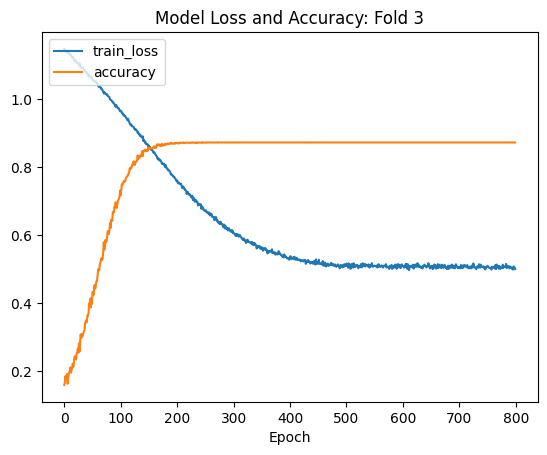

1/1 - 0s - loss: 0.4778 - accuracy: 0.8732 - mae: 0.1771 - mse: 0.0786 - 160ms/epoch - 160ms/step
['loss', 'accuracy', 'mae', 'mse']
-------Fold 4-------
X_train shape: (2492, 420), y_train shape: (2492, 1)
X_test shape: (623, 420), y_test shape: (623, 1)
Training set buy/sell/hold split:
[[   0 2175]
 [   1  156]
 [   2  161]]
[[   0 2175]
 [   1  156]
 [   2  161]]
Test set buy/sell/hold split:
[[  0 544]
 [  1  39]
 [  2  40]]
[[  0 544]
 [  1  39]
 [  2  40]]
X_train_selected shape: (2492, 225)
y_val labels shape: (2492, 3), y_test labels shape: (623, 3)
X_train (fold) Images shape: (2492, 15, 15, 1), X_test (fold) Images shape: (623, 15, 15, 1)

Epoch 1/800


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


3/3 - 1s - loss: 1.1330 - accuracy: 0.2006 - mae: 0.4513 - mse: 0.2299 - lr: 0.0010 - 1s/epoch - 365ms/step
Epoch 2/800
3/3 - 0s - loss: 1.1319 - accuracy: 0.1862 - mae: 0.4511 - mse: 0.2297 - lr: 0.0010 - 50ms/epoch - 17ms/step
Epoch 3/800
3/3 - 0s - loss: 1.1353 - accuracy: 0.1862 - mae: 0.4519 - mse: 0.2304 - lr: 0.0010 - 46ms/epoch - 15ms/step
Epoch 4/800
3/3 - 0s - loss: 1.1316 - accuracy: 0.1870 - mae: 0.4511 - mse: 0.2296 - lr: 0.0010 - 46ms/epoch - 15ms/step
Epoch 5/800
3/3 - 0s - loss: 1.1296 - accuracy: 0.2055 - mae: 0.4506 - mse: 0.2292 - lr: 0.0010 - 41ms/epoch - 14ms/step
Epoch 6/800
3/3 - 0s - loss: 1.1286 - accuracy: 0.2107 - mae: 0.4504 - mse: 0.2289 - lr: 0.0010 - 37ms/epoch - 12ms/step
Epoch 7/800
3/3 - 0s - loss: 1.1272 - accuracy: 0.2087 - mae: 0.4501 - mse: 0.2286 - lr: 0.0010 - 36ms/epoch - 12ms/step
Epoch 8/800
3/3 - 0s - loss: 1.1275 - accuracy: 0.2067 - mae: 0.4502 - mse: 0.2287 - lr: 0.0010 - 36ms/epoch - 12ms/step
Epoch 9/800
3/3 - 0s - loss: 1.1244 - accurac

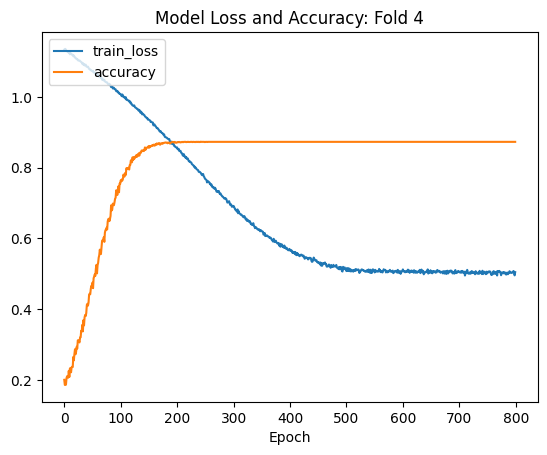

1/1 - 0s - loss: 0.4883 - accuracy: 0.8732 - mae: 0.1848 - mse: 0.0796 - 164ms/epoch - 164ms/step
['loss', 'accuracy', 'mae', 'mse']
-------Fold 5-------
X_train shape: (2492, 420), y_train shape: (2492, 1)
X_test shape: (623, 420), y_test shape: (623, 1)
Training set buy/sell/hold split:
[[   0 2176]
 [   1  156]
 [   2  160]]
[[   0 2176]
 [   1  156]
 [   2  160]]
Test set buy/sell/hold split:
[[  0 543]
 [  1  39]
 [  2  41]]
[[  0 543]
 [  1  39]
 [  2  41]]
X_train_selected shape: (2492, 225)
y_val labels shape: (2492, 3), y_test labels shape: (623, 3)
X_train (fold) Images shape: (2492, 15, 15, 1), X_test (fold) Images shape: (623, 15, 15, 1)

Epoch 1/800


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


3/3 - 1s - loss: 1.1123 - accuracy: 0.2705 - mae: 0.4460 - mse: 0.2256 - lr: 0.0010 - 1s/epoch - 362ms/step
Epoch 2/800
3/3 - 0s - loss: 1.1130 - accuracy: 0.2652 - mae: 0.4462 - mse: 0.2258 - lr: 0.0010 - 36ms/epoch - 12ms/step
Epoch 3/800
3/3 - 0s - loss: 1.1118 - accuracy: 0.2721 - mae: 0.4460 - mse: 0.2255 - lr: 0.0010 - 36ms/epoch - 12ms/step
Epoch 4/800
3/3 - 0s - loss: 1.1105 - accuracy: 0.2765 - mae: 0.4456 - mse: 0.2253 - lr: 0.0010 - 36ms/epoch - 12ms/step
Epoch 5/800
3/3 - 0s - loss: 1.1037 - accuracy: 0.3050 - mae: 0.4442 - mse: 0.2238 - lr: 0.0010 - 36ms/epoch - 12ms/step
Epoch 6/800
3/3 - 0s - loss: 1.1072 - accuracy: 0.2797 - mae: 0.4449 - mse: 0.2245 - lr: 0.0010 - 36ms/epoch - 12ms/step
Epoch 7/800
3/3 - 0s - loss: 1.1053 - accuracy: 0.3062 - mae: 0.4444 - mse: 0.2240 - lr: 0.0010 - 36ms/epoch - 12ms/step
Epoch 8/800
3/3 - 0s - loss: 1.1018 - accuracy: 0.3058 - mae: 0.4437 - mse: 0.2234 - lr: 0.0010 - 35ms/epoch - 12ms/step
Epoch 9/800
3/3 - 0s - loss: 1.1030 - accurac

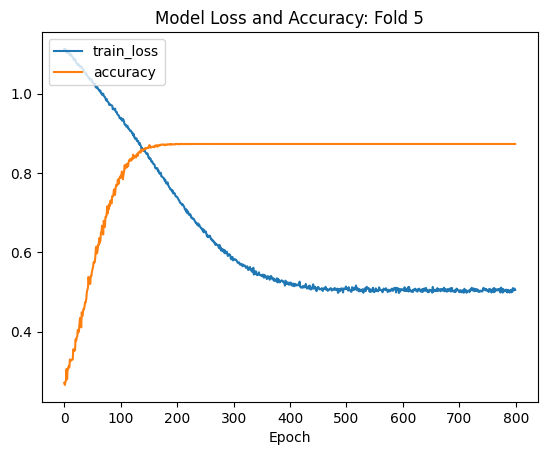

1/1 - 0s - loss: 0.4761 - accuracy: 0.8716 - mae: 0.1705 - mse: 0.0783 - 164ms/epoch - 164ms/step
['loss', 'accuracy', 'mae', 'mse']


In [ ]:
# model prediction scores
cnn_scores = []

# store each cnn
models = []

# initial fold
fold = 1

# loop through folds built from training set
for train_index, test_index in skf.split(X_train, y_train):
  print(f"-------Fold {fold}-------")
  # create test train split from original training set using specified indices
  X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
  y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

  # print train shapes
  print(f"X_train shape: {X_train_fold.shape}, y_train shape: {y_train_fold.shape}")
  print(f"X_test shape: {X_test_fold.shape}, y_test shape: {y_test_fold.shape}")

  # print value counts
  print("Training set buy/sell/hold split:")
  unique, counts = np.unique(y_train_fold, return_counts=True)
  print(np.asarray((unique, counts)).T)
  print(np.asarray((unique, counts)).T)

  print("Test set buy/sell/hold split:")
  unique, counts = np.unique(y_test_fold, return_counts=True)
  print(np.asarray((unique, counts)).T)
  print(np.asarray((unique, counts)).T)

  # select K best features (225)
  X_train_fold_selected = selector.fit_transform(X_train_fold,y_train_fold.ravel())
  print(f"X_train_selected shape: {X_train_fold_selected.shape}")

  # selected features
  selected_feature_idxs = selector.get_support(indices=True)
  selected_features = X.iloc[:,selected_feature_idxs].columns
  # print(X.iloc[:,selected_feature_idxs].columns)

  # subset selected features from test set
  X_test_fold_selected = X_test_fold[:, selector.get_support(indices=True)]

  # normalize using min max scalar
  X_train_fold_selected = MM_SCALER.fit_transform(X_train_fold_selected)
  X_test_fold_selected = MM_SCALER.transform(X_test_fold_selected)

  # reshape into 15x15
  X_train_fs_images = X_train_fold_selected.reshape(X_train_fold_selected.shape[0], 15, 15)
  X_test_fs_images = X_test_fold_selected.reshape(X_test_fold_selected.shape[0], 15, 15)

  # encode labels, y train/test (using OHE)
  y_train_fold = OHE.fit_transform(y_train_fold.reshape(-1, 1)) # Reshapes to a column vector
  y_test_fold = OHE.transform(y_test_fold.reshape(-1, 1))
  print(f"y_val labels shape: {y_train_fold.shape}, y_test labels shape: {y_test_fold.shape}")

  # Reshape input images to include a single channel to fit CNN Sequential Layer
  X_train_fs_images = np.expand_dims(X_train_fs_images, axis=-1)
  X_test_fs_images = np.expand_dims(X_test_fs_images, axis=-1)
  print(f"X_train (fold) Images shape: {X_train_fs_images.shape}, X_test (fold) Images shape: {X_test_fs_images.shape}\n")

  # train CNN (fit model)
  fold_cnn = createCNN()
  hist = fold_cnn.fit(X_train_fs_images, y_train_fold,
          batch_size=params["batch_size"],
          epochs=params["epochs"],
          callbacks=[rlp],
          verbose=2)

  #models.append(fold_cnn)

  # plot accuracy
  modelPlotter(hist, fold)

  # score model using test data (predicts values internally)
  cnn_scores.append([fold_cnn.evaluate(X_test_fs_images, y_test_fold,
                                      batch_size=params["batch_size"],
                                      verbose=2), selected_features])
  print(fold_cnn.metrics_names)

  # fold counter
  fold +=1


#### Cross Validation Outcomes

In [ ]:
from statistics import mean, stdev

# scores: ['loss', 'accuracy', 'mae', 'mse']
cnn_scores

print(f"Score Metrics: ['loss', 'accuracy', 'mae', 'mse']\n")
max_accuracy = [sublist[0][1] for sublist in cnn_scores]
max_loss = [sublist[0][0] for sublist in cnn_scores]

print('List of possible accuracy: ', max_accuracy)
print('List of possible loss: ', max_loss)
print('\nHighest Accuracy obtained from the model: ',
      max(max_accuracy))
print('\nLowest Accuracy: ',
      min(max_accuracy))
print('\nOverall Accuracy: ',
      mean(max_accuracy))
print('\nStandard Deviation of accuracy: ', stdev(max_accuracy))

index = -1; # location of model with the highest accuracy
max_accuracy_cols = None
for sublist in cnn_scores:
    index += 1;
    if sublist[0][1] == max(max_accuracy):
        max_accuracy_cols = sublist[1]
        break

print(f"\nHighest Accuracy: {max(max_accuracy)}")

print(f"Selected Features with highest Accuracy: {max_accuracy_cols}\n")

Score Metrics: ['loss', 'accuracy', 'mae', 'mse']

List of possible accuracy:  [0.8731942176818848, 0.8731942176818848, 0.8731942176818848, 0.8731942176818848, 0.8715890645980835]
List of possible loss:  [0.491408109664917, 0.4856330156326294, 0.4778352677822113, 0.4882541000843048, 0.4761121869087219]

Highest Accuracy obtained from the model:  0.8731942176818848

Lowest Accuracy:  0.8715890645980835

Overall Accuracy:  0.8728731870651245

Standard Deviation of accuracy:  0.000717846281934611

Highest Accuracy: 0.8731942176818848
Selected Features with highest Accuracy: Index(['RSI_ta_6', 'RSI_ta_7', 'RSI_ta_8', 'RSI_ta_9', 'RSI_ta_10', 'RSI_ta_11', 'RSI_ta_12', 'RSI_ta_13', 'RSI_ta_14', 'RSI_ta_15',
       ...
       'AWSM_ta_7', 'AWSM_ta_8', 'AWSM_ta_9', 'AWSM_ta_10', 'AWSM_ta_11', 'AWSM_ta_12', 'AWSM_ta_13', 'AWSM_ta_14', 'AWSM_ta_15', 'AWSM_ta_16'],
      dtype='object', length=225)



# Export Selected Features

In [ ]:
max_accuracy_cols = pd.DataFrame(max_accuracy_cols)
max_accuracy_cols.to_csv(f"data/{stock}_selected_features.csv")

#Notes:

### Testing Outcome List Parsing

In [ ]:
from statistics import mean, stdev
from operator import itemgetter
import random


def randList():
  randomlist = []
  for i in range(5):
    n = random.randint(1,100)
    randomlist.append(n)

  return randomlist

def randCharList():
  randomlist = []
  for i in range(5):
    n = random.randint(97,122)
    randomlist.append(chr(n))

  return randomlist

# test
test = []
for i in range(0, 5):
  cnn = createCNN();

  test.append([randList(), randCharList()])

max_accuracy = [sublist[0][1] for sublist in test]

print('List of possible accuracy: ', max_accuracy)
print('\nMaximum Accuracy obtained from the model: ',
      max(max_accuracy))
print('\nMinimum Accuracy: ',
      min(max_accuracy))
print('\nOverall Accuracy: ',
      mean(max_accuracy))
print('\nStandard Deviation is: ', stdev(max_accuracy))

max_accuracy_feats = None
for sublist in test:
    if sublist[0][1] == max(max_accuracy):
        max_accuracy_cols = sublist[1]
        break

print(f"\nMax Accuracy: {max(max_accuracy)}, Columns of max accuracy: {max_accuracy_feats}\n")

test

List of possible accuracy:  [60, 96, 12, 7, 29]

Maximum Accuracy obtained from the model:  96

Minimum Accuracy:  7

Overall Accuracy:  40.8

Standard Deviation is:  37.171225430432074

Max Accuracy: 96, Columns of max accuracy: None



[[[75, 60, 47, 71, 7], ['l', 'o', 'l', 'j', 'g']],
 [[1, 96, 5, 78, 38], ['y', 'j', 'o', 'u', 't']],
 [[65, 12, 18, 60, 96], ['k', 'x', 'w', 'v', 'b']],
 [[67, 7, 86, 75, 52], ['i', 's', 'v', 'v', 'n']],
 [[41, 29, 50, 3, 12], ['k', 'v', 'e', 'k', 'c']]]

### Feature Selection w/o Cross-Validation (example)

***Not in use, included as reference**

##### Univariate Feature Selection

###### Train Test Split

In [ ]:
# Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, train_size=0.8,
                                                    test_size=0.2, random_state=2, shuffle=True,
                                                    stratify=y.values)

In [ ]:
# select 225 best features
selector = SelectKBest(f_classif, k=225)

X_train_selected = selector.fit_transform(X_train,y_train.ravel())

In [ ]:
X_train_selected.shape

(3115, 225)

In [ ]:
# normalize p-values
scores = -np.log10(selector.pvalues_)
scores /= scores.max()

In [ ]:
for col in zip(X.columns, scores):
  print(col)

('RSI_ta_6', 0.7291381080720535)
('RSI_ta_7', 0.6496420637677753)
('RSI_ta_8', 0.5853678907070512)
('RSI_ta_9', 0.5327830743240326)
('RSI_ta_10', 0.48915901296795083)
('RSI_ta_11', 0.4524738335188002)
('RSI_ta_12', 0.42123687049429503)
('RSI_ta_13', 0.39434023743855706)
('RSI_ta_14', 0.37094997670007285)
('RSI_ta_15', 0.3504293963213484)
('RSI_ta_16', 0.33228547947223097)
('RSI_ta_17', 0.3161312286319504)
('RSI_ta_18', 0.3016589365011716)
('RSI_ta_19', 0.28862098484741133)
('RSI_ta_20', 0.27681587877471164)
('WILLR_ta_6', 0.5374439963818087)
('WILLR_ta_7', 0.5152259335325249)
('WILLR_ta_8', 0.4731395972340891)
('WILLR_ta_9', 0.44396215065432837)
('WILLR_ta_10', 0.40464979767992504)
('WILLR_ta_11', 0.3746977861227912)
('WILLR_ta_12', 0.35818928633332886)
('WILLR_ta_13', 0.33767623155997983)
('WILLR_ta_14', 0.3215428606022373)
('WILLR_ta_15', 0.3110707159770372)
('WILLR_ta_16', 0.2891214504200746)
('WILLR_ta_17', 0.2802369860508098)
('WILLR_ta_18', 0.27441798988787447)
('WILLR_ta_19', 0.

In [ ]:
high_pval = 0

for col in zip(X.columns, scores):
  if col[1] > 0.05:
    high_pval += 1
    print(col)

print(f"Features with p-values higher than 0.05: {high_pval}")

('RSI_ta_6', 0.7291381080720535)
('RSI_ta_7', 0.6496420637677753)
('RSI_ta_8', 0.5853678907070512)
('RSI_ta_9', 0.5327830743240326)
('RSI_ta_10', 0.48915901296795083)
('RSI_ta_11', 0.4524738335188002)
('RSI_ta_12', 0.42123687049429503)
('RSI_ta_13', 0.39434023743855706)
('RSI_ta_14', 0.37094997670007285)
('RSI_ta_15', 0.3504293963213484)
('RSI_ta_16', 0.33228547947223097)
('RSI_ta_17', 0.3161312286319504)
('RSI_ta_18', 0.3016589365011716)
('RSI_ta_19', 0.28862098484741133)
('RSI_ta_20', 0.27681587877471164)
('WILLR_ta_6', 0.5374439963818087)
('WILLR_ta_7', 0.5152259335325249)
('WILLR_ta_8', 0.4731395972340891)
('WILLR_ta_9', 0.44396215065432837)
('WILLR_ta_10', 0.40464979767992504)
('WILLR_ta_11', 0.3746977861227912)
('WILLR_ta_12', 0.35818928633332886)
('WILLR_ta_13', 0.33767623155997983)
('WILLR_ta_14', 0.3215428606022373)
('WILLR_ta_15', 0.3110707159770372)
('WILLR_ta_16', 0.2891214504200746)
('WILLR_ta_17', 0.2802369860508098)
('WILLR_ta_18', 0.27441798988787447)
('WILLR_ta_19', 0.

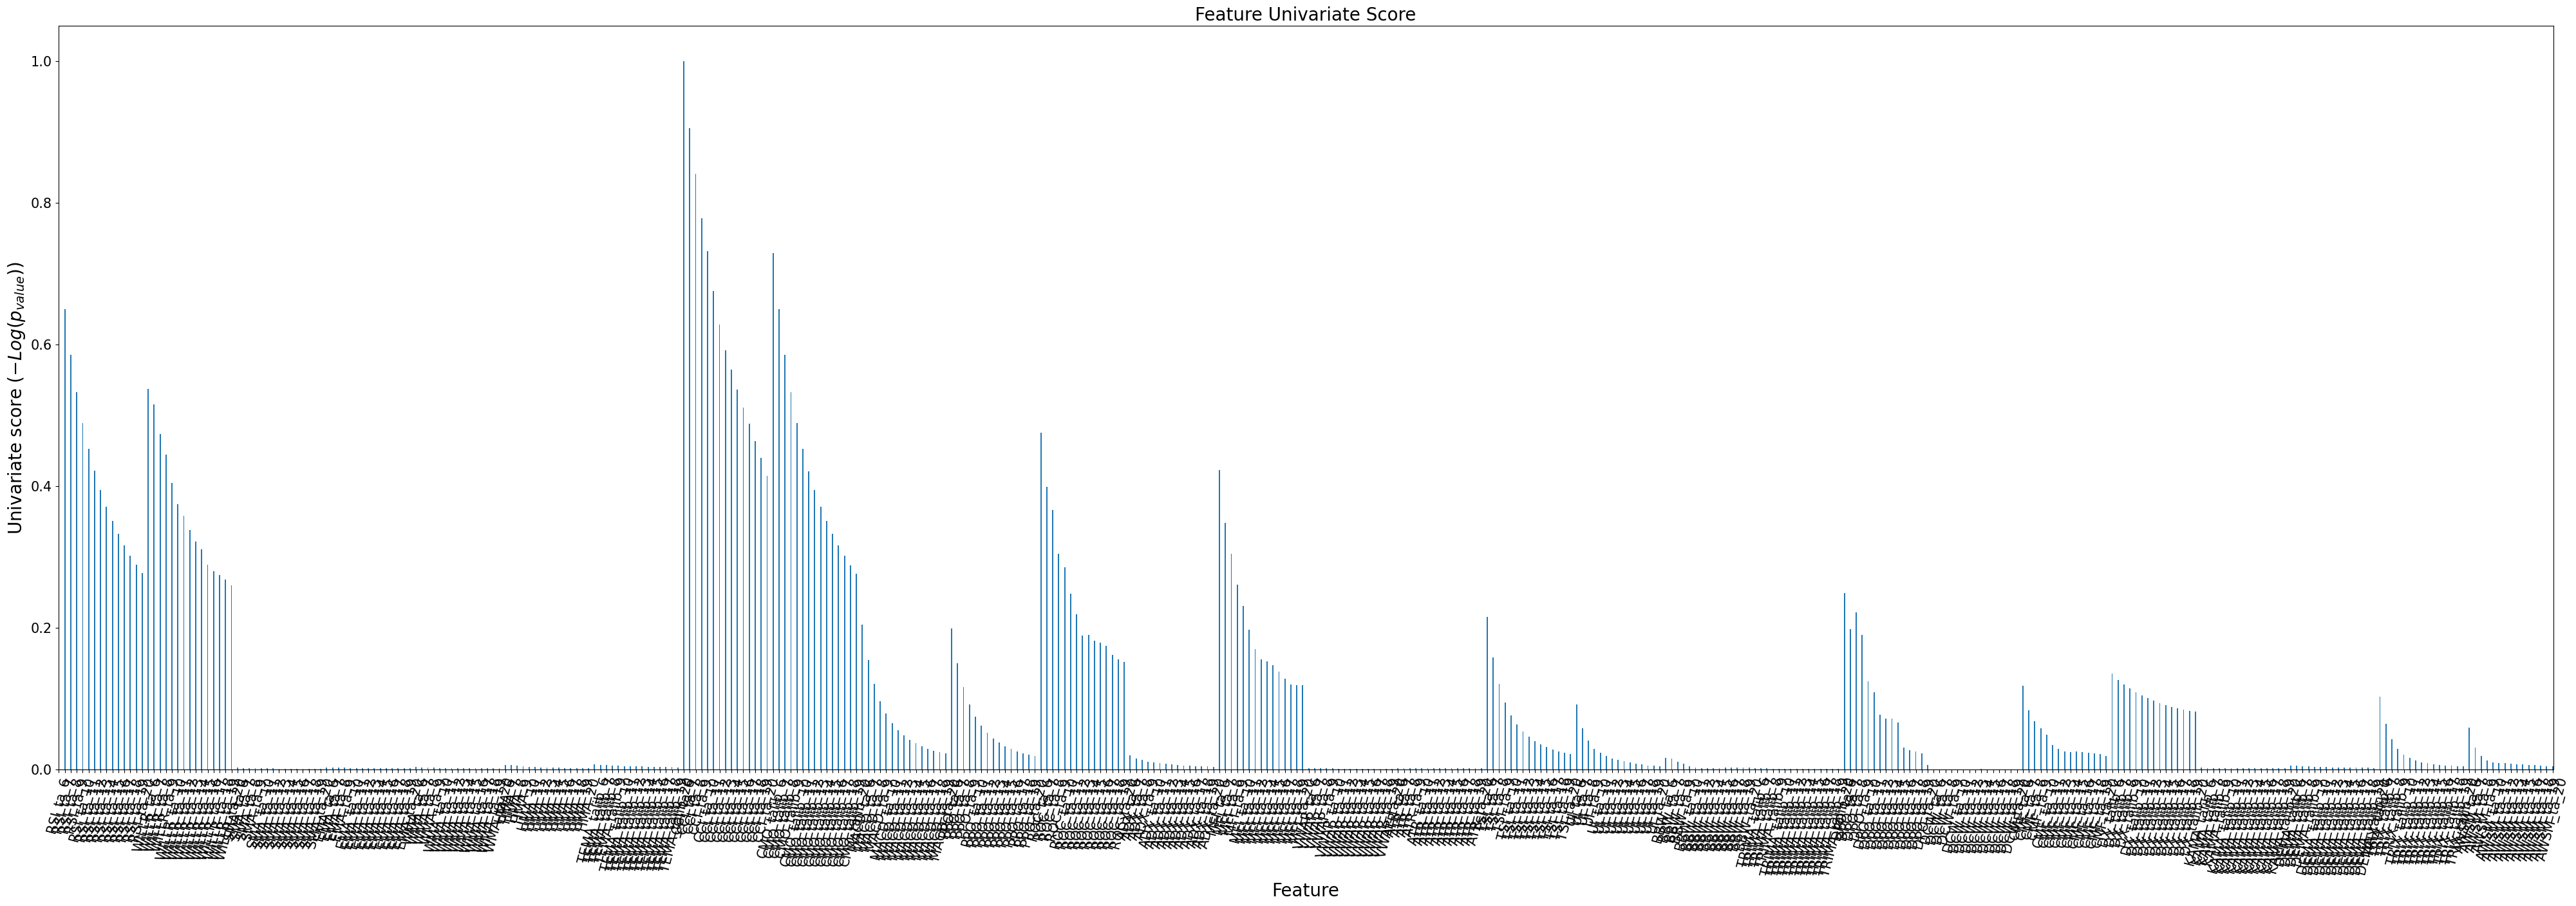

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(50,15))
plt.bar(X.columns, scores, width=0.2)
plt.title("Feature Univariate Score", fontsize=20)
plt.xlabel("Feature", fontsize=20)
plt.ylabel(r"Univariate score ($-Log(p_{value})$)", fontsize=20)
plt.xticks(rotation=75, fontsize=15)
plt.yticks(fontsize=15)
plt.margins(x=0)
plt.show()